<a href="https://colab.research.google.com/github/sssiyam-sudo/MasterThesisWork/blob/main/clinicalBenifits2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all the necessary libraries & packages.

In [41]:
import os
import pandas as pd
import numpy as np
from math import sqrt
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn import preprocessing , metrics , model_selection
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.feature_selection import SelectKBest ,chi2
from sklearn.metrics import mean_squared_error , classification_report 

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold , ShuffleSplit

In [42]:
df = pd.read_csv('/content/drive/MyDrive/ThesisWork/nsclc_pd1_msk_2018_clinical_data.tsv', sep='\t')

#-----------------
#-----------------
#-----------------

-------------------------------------
## **Data exploration and cleaning.**
-------------------------------------

In [43]:
df.head()

,Study ID,Patient ID,Sample ID,Diagnosis Age,Cancer Type,Cancer Type Detailed,Durable Clinical Benefit,FGA,Fraction Genome Altered,Gene Panel,...,Oncotree Code,PD-L1 Score (%),Progress Free Survival (Months),Progression Free Status,Number of Samples Per Patient,Sex,Smoker,Somatic Status,TMB (nonsynonymous),Treatment Type
0,nsclc_pd1_msk_2018,P-0000012,P-0000012-T03-IM3,58,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,YES,0.18,0.1844,IMPACT341,...,LUAD,NaN,27.20,0:Not Progressed,1,Female,Ever,Matched,32.165504,Combination
1,nsclc_pd1_msk_2018,P-0000082,P-0000082-T01-IM3,60,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,YES,0.36,0.3606,IMPACT341,...,LUAD,100.0,14.50,1:Progressed,1,Male,Ever,Matched,1.109155,Monotherapy
2,nsclc_pd1_msk_2018,P-0000208,P-0000208-T01-IM3,68,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,NO,0.12,0.1173,IMPACT341,...,LUAD,3.0,4.17,1:Progressed,1,Female,Ever,Matched,2.218311,Monotherapy
3,nsclc_pd1_msk_2018,P-0000235,P-0000235-T01-IM3,77,Non-Small Cell Lung Cancer,Lung Squamous Cell Carcinoma,NO,0.24,0.2380,IMPACT341,...,LUSC,NaN,0.60,1:Progressed,1,Male,Ever,Matched,8.873242,Monotherapy
4,nsclc_pd1_msk_2018,P-0000299,P-0000299-T01-IM3,66,Non-Small Cell Lung Cancer,Large Cell Neuroendocrine Carcinoma,NO,0.01,0.0051,IMPACT341,...,LUNE,NaN,1.63,1:Progressed,1,Male,Ever,Matched,7.764087,Combination


In [44]:
df.rename(columns = {'Study ID':'Study_ID', 'Patient ID':'Patient_ID',
                     'Sample ID':'Sample_ID' , 'Diagnosis Age':'Diagnosis_Age' ,
                     'Cancer Type':'Cancer_Type' , 'Cancer Type Detailed':'Cancer_Type_Detailed' ,
                     'Durable Clinical Benefit':'Durable_Clinical_Benefit' , 'FGA':'FGA' , 
                     'Fraction Genome Altered':'Fraction_Genome_Altered' , 'Gene Panel':'Gene_Panel',
                     'Lines of treatment':'Lines_of_treatment' , 'Mutation Count':'Mutation_Count' , 
                     'Mutation Rate':'Mutation_Rate' , 'Oncotree Code':'Oncotree_Code', 
                     'PD-L1 Score (%)':'PD-L1Score%' , 'Progress Free Survival (Months)':'ProgressFreeSurvival_Months' ,
                     'Progression Free Status':'ProgressionFreeStatus' ,
                     'Number of Samples Per Patient':'Number_of_Samples_Per_Patient' , 'Sex':'Gender' ,
                     'Smoker':'Smoker' , 'Somatic Status':'Somatic_Status' , 'TMB (nonsynonymous)':'TMB(nonsynonymous)',
                     'Treatment Type':'Treatment_Type'}, inplace = True)

In [45]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Study_ID                       240 non-null    object 
 1   Patient_ID                     240 non-null    object 
 2   Sample_ID                      240 non-null    object 
 3   Diagnosis_Age                  240 non-null    int64  
 4   Cancer_Type                    240 non-null    object 
 5   Cancer_Type_Detailed           240 non-null    object 
 6   Durable_Clinical_Benefit       240 non-null    object 
 7   FGA                            240 non-null    float64
 8   Fraction_Genome_Altered        240 non-null    float64
 9   Gene_Panel                     240 non-null    object 
 10  IRB                            240 non-null    object 
 11  Lines_of_treatment             240 non-null    int64  
 12  Mutation_Count                 240 non-null    int

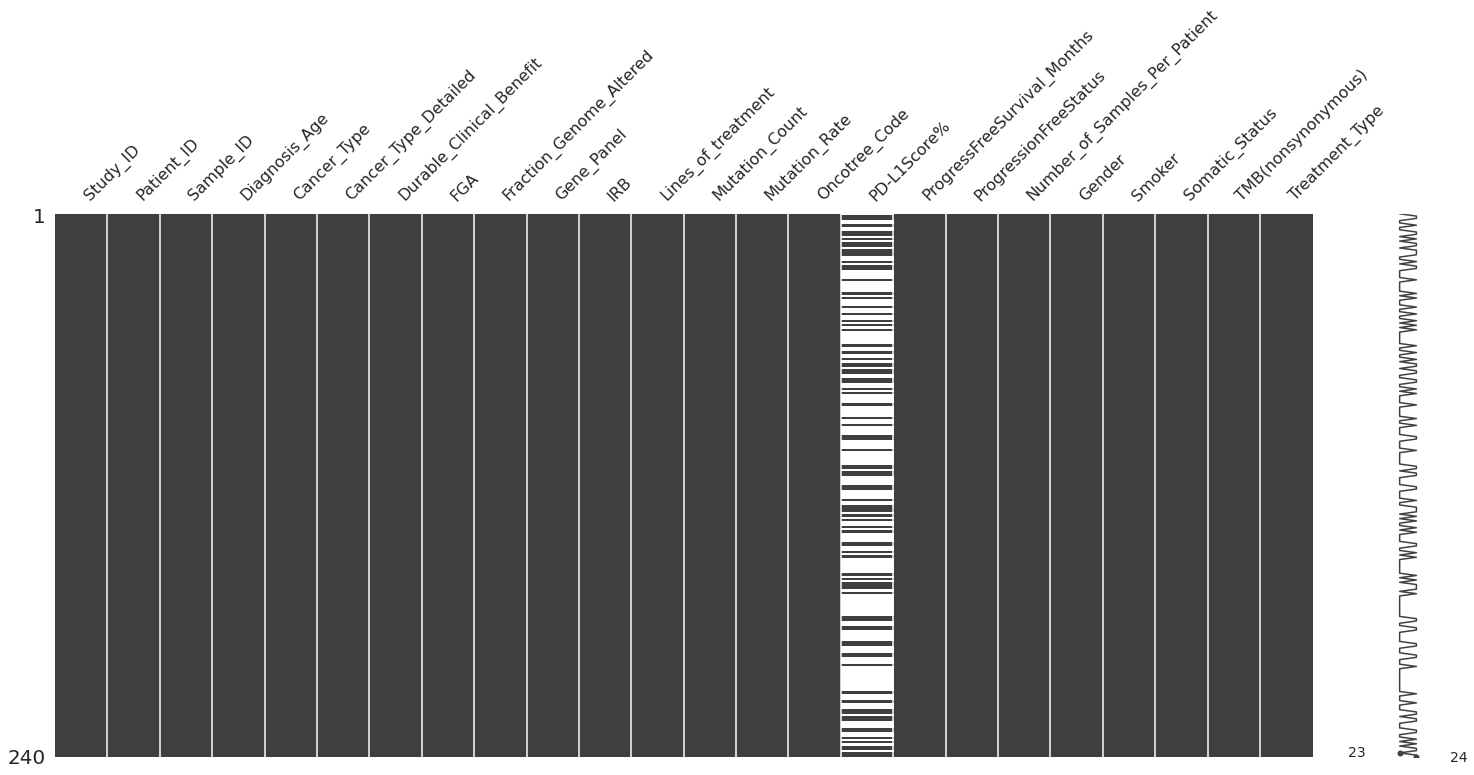

In [46]:
msno.matrix(df)

In [47]:
df.drop(df.columns[15], axis=1, inplace=True) #dropping the column with null value in it.

In [48]:
df.groupby(['Durable_Clinical_Benefit'])['Durable_Clinical_Benefit'].count()

Durable_Clinical_Benefit
NE      13
NO     158
YES     69
Name: Durable_Clinical_Benefit, dtype: int64

#-----------------
#-----------------
#-----------------

----------------------------
# **FEATURE** **SELECTION.**
----------------------------

In [49]:
df2 = pd.read_csv('/content/drive/MyDrive/ThesisWork/nsclc_pd1_msk_2018_clinical_data.tsv', sep='\t')

In [50]:
df2.rename(columns = {'Study ID':'Study_ID', 'Patient ID':'Patient_ID',
                     'Sample ID':'Sample_ID' , 'Diagnosis Age':'Diagnosis_Age' ,
                     'Cancer Type':'Cancer_Type' , 'Cancer Type Detailed':'Cancer_Type_Detailed' ,
                     'Durable Clinical Benefit':'Durable_Clinical_Benefit' , 'FGA':'FGA' , 
                     'Fraction Genome Altered':'Fraction_Genome_Altered' , 'Gene Panel':'Gene_Panel',
                     'Lines of treatment':'Lines_of_treatment' , 'Mutation Count':'Mutation_Count' , 
                     'Mutation Rate':'Mutation_Rate' , 'Oncotree Code':'Oncotree_Code', 
                     'PD-L1 Score (%)':'PD-L1Score%' , 'Progress Free Survival (Months)':'ProgressFreeSurvival_Months' ,
                     'Progression Free Status':'ProgressionFreeStatus' ,
                     'Number of Samples Per Patient':'Number_of_Samples_Per_Patient' , 'Sex':'Gender' ,
                     'Smoker':'Smoker' , 'Somatic Status':'Somatic_Status' , 'TMB (nonsynonymous)':'TMB(nonsynonymous)',
                     'Treatment Type':'Treatment_Type'}, inplace = True)

In [51]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Study_ID                       240 non-null    object 
 1   Patient_ID                     240 non-null    object 
 2   Sample_ID                      240 non-null    object 
 3   Diagnosis_Age                  240 non-null    int64  
 4   Cancer_Type                    240 non-null    object 
 5   Cancer_Type_Detailed           240 non-null    object 
 6   Durable_Clinical_Benefit       240 non-null    object 
 7   FGA                            240 non-null    float64
 8   Fraction_Genome_Altered        240 non-null    float64
 9   Gene_Panel                     240 non-null    object 
 10  IRB                            240 non-null    object 
 11  Lines_of_treatment             240 non-null    int64  
 12  Mutation_Count                 240 non-null    int

In [52]:
df2.drop(df2.columns[[0,1,2,15,16]], axis=1, inplace=True) #dropping the columns that have no impact.

In [53]:
# initializing sklearn labelencoder
label_encoder = preprocessing.LabelEncoder()

cols = ['Cancer_Type', 'Cancer_Type_Detailed','Gene_Panel','IRB','Oncotree_Code','ProgressionFreeStatus','Gender','Smoker','Somatic_Status','Treatment_Type']
# sklearn labelencoder
df2[cols] = df2[cols].apply(preprocessing.LabelEncoder().fit_transform)
X2 = df2.drop(["Durable_Clinical_Benefit"], axis=1)
y2 = df2["Durable_Clinical_Benefit"]

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X2,y2)

In [54]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X2.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns

print(featureScores.nlargest(20,'Score'))  #print 10 best features

                          Feature       Score
8                  Mutation_Count  113.132251
16             TMB(nonsynonymous)  103.585056
9                   Mutation_Rate  101.829634
11          ProgressionFreeStatus   21.622310
10                  Oncotree_Code    7.979357
0                   Diagnosis_Age    7.753619
7              Lines_of_treatment    4.794653
5                      Gene_Panel    4.674003
6                             IRB    3.908570
14                         Smoker    2.120265
17                 Treatment_Type    0.956999
2            Cancer_Type_Detailed    0.702379
3                             FGA    0.258858
4         Fraction_Genome_Altered    0.254164
13                         Gender    0.189445
12  Number_of_Samples_Per_Patient    0.000000


In [55]:
#Finally we will keep only the columns that have the bigger impacts on the target.
df.drop(df.columns[[0,1,2,4,5,7,8,15,17,18,20]], axis=1, inplace=True)

#----------------------------------------------------
#----------------------------------------------------
#----------------------------------------------------

-------------------------------
# **Classification** **Models.**
-------------------------------

**Splitting the dataset in train and test set.**

In [56]:
df = df.sample(frac=1) #this will randomly shuffle the rows to make sure the data is not sorted.

In [57]:
df.drop(df.index[df['Durable_Clinical_Benefit'] == 'NE'], inplace=True) #removing the NE class from the dataset

In [58]:
X = df.drop(["Durable_Clinical_Benefit"], axis=1)
y = df["Durable_Clinical_Benefit"] #This will be our target to predict.

In [59]:
X = pd.get_dummies(X) #One Hot Encoding 
# initializing sklearn labelencoder
label_encoder = preprocessing.LabelEncoder()
cols = ['Durable_Clinical_Benefit']
# sklearn labelencoder
df[cols] = df[cols].apply(preprocessing.LabelEncoder().fit_transform)
y = df["Durable_Clinical_Benefit"]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.21, shuffle = True, random_state = 0)

In [61]:
print(f"TRAINING DATA: {X_train.shape[0]}\nTESTING DATA: {X_test.shape[0]}" )

TRAINING DATA: 179
TESTING DATA: 48


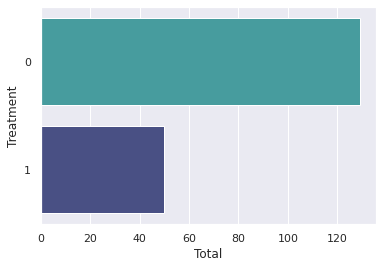

In [62]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, data= X_train, palette="mako_r")
plt.ylabel('Treatment')
plt.xlabel('Total')
plt.show()

In [63]:
#X_train_2, y_train_2 = SMOTE().fit_resample(X_train, y_train)
#sns.set_theme(style="darkgrid")
#sns.countplot(y=y_train_2, data= X_train_2, palette="mako_r")
#plt.ylabel('Cancer Type')
#plt.xlabel('Total')
#plt.show()

Logisctic Regression

In [64]:
LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))


LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.76      0.97      0.85        29
           1       0.91      0.53      0.67        19

    accuracy                           0.79        48
   macro avg       0.83      0.75      0.76        48
weighted avg       0.82      0.79      0.78        48

Logistic Regression accuracy is: 79.17%


Decision Tree

In [65]:
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=10)
DTclassifier.fit(X_train, y_train)

y_pred = DTclassifier.predict(X_test)
print(classification_report(y_test, y_pred))

DTAcc = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100))

              precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.79      0.58      0.67        19

    accuracy                           0.77        48
   macro avg       0.78      0.74      0.75        48
weighted avg       0.77      0.77      0.76        48

Decision Tree accuracy is: 77.08%


Random Forest

In [66]:
RFclassifier = RandomForestClassifier(max_leaf_nodes=10)
                                      
RFclassifier.fit(X_train, y_train)

y_pred = RFclassifier.predict(X_test)
print(classification_report(y_test, y_pred))

RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

              precision    recall  f1-score   support

           0       0.76      0.97      0.85        29
           1       0.91      0.53      0.67        19

    accuracy                           0.79        48
   macro avg       0.83      0.75      0.76        48
weighted avg       0.82      0.79      0.78        48

Random Forest accuracy is: 79.17%


Support Vector Machine

In [67]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_test)
print(classification_report(y_test, y_pred))

SVMAcc = accuracy_score(y_pred,y_test)
print('SVM accuracy is: {:.2f}%'.format(SVMAcc*100))


              precision    recall  f1-score   support

           0       0.75      0.93      0.83        29
           1       0.83      0.53      0.65        19

    accuracy                           0.77        48
   macro avg       0.79      0.73      0.74        48
weighted avg       0.78      0.77      0.76        48

SVM accuracy is: 77.08%


K-nearest neighbours

In [68]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

KNNAccuracy = accuracy_score(y_pred,y_test)
print('KNN accuracy is: {:.2f}%'.format(KNNAccuracy*100))

              precision    recall  f1-score   support

           0       0.61      0.93      0.74        29
           1       0.50      0.11      0.17        19

    accuracy                           0.60        48
   macro avg       0.56      0.52      0.46        48
weighted avg       0.57      0.60      0.52        48

KNN accuracy is: 60.42%


#---------------------
#---------------------
#---------------------

------------------------------------------
**K-fold cross validation of each model.**
------------------------------------------

In [69]:
kfold = model_selection.KFold(n_splits=5)
model_kfold = LogisticRegression(max_iter=5000)
results_kfold_LR = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)

kfold = model_selection.KFold(n_splits=5)
model_kfold = DecisionTreeClassifier(max_leaf_nodes=3)
results_kfold_DT = model_selection.cross_val_score(model_kfold, X, y, cv=kfold) 

kfold = model_selection.KFold(n_splits=5)
model_kfold = RandomForestClassifier(max_leaf_nodes=30)
results_kfold_RF = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)

kfold = model_selection.KFold(n_splits=5)
model_kfold = SVC(kernel='linear')
results_kfold_SVM = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)

kfold = model_selection.KFold(n_splits=5)
model_kfold = KNeighborsClassifier(n_neighbors=7)
results_kfold_KNN = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)

print("Logistic Regression's Kfold CV Accuracy: %.2f%%" % (results_kfold_LR.mean()*100.0))  
print("Decision Tree's Kfold CV Accuracy: %.2f%%" % (results_kfold_DT.mean()*100.0)) 
print("Random Forest's Kfold CV Accuracy: %.2f%%" % (results_kfold_RF.mean()*100.0)) 
print("Support Vector's Kfold CV Accuracy: %.2f%%" % (results_kfold_SVM.mean()*100.0))
print("K-nearest Neighbour's Kfold CV Accuracy: %.2f%%" % (results_kfold_KNN.mean()*100.0)) 

Logistic Regression's Kfold CV Accuracy: 81.50%
Decision Tree's Kfold CV Accuracy: 82.39%
Random Forest's Kfold CV Accuracy: 82.37%
Support Vector's Kfold CV Accuracy: 80.18%
K-nearest Neighbour's Kfold CV Accuracy: 69.63%


In [81]:
#@title
classifier = ['LR','DT' , 'RF' ,'SVM' , 'KNN']
accuracy = [81.50,82.39,82.37,80.18,69.63]
d = {'Classifiers':classifier,'Accuracy':accuracy}
scores = pd.DataFrame(d)
scores

,Classifiers,Accuracy
0,LR,81.50
1,DT,82.39
2,RF,82.37
3,SVM,80.18
4,KNN,69.63


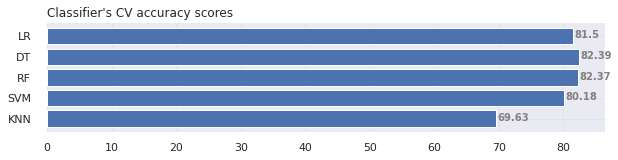

In [82]:
#@title
# Figure Size
fig, ax = plt.subplots(figsize =(10, 2))
 
# Horizontal Bar Plot
ax.barh(classifier, accuracy)
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
# Add Plot Title
ax.set_title("Classifier's CV accuracy scores",
             loc ='left', )
# Show Plot
plt.show() 

# #------------------------------------

## #-------------------------------

## Showing feature importance on Tree_based classifier.

In [72]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [73]:
dt = DecisionTreeClassifier() #no parameters selection
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [74]:
def print_tree(dt):
  dot_data = StringIO()

  export_graphviz(dt, out_file = dot_data, filled = True, rounded = True,
                  feature_names = X.columns,
                  class_names = ['No response' , 'Response'])
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
  return Image(graph.create_png())

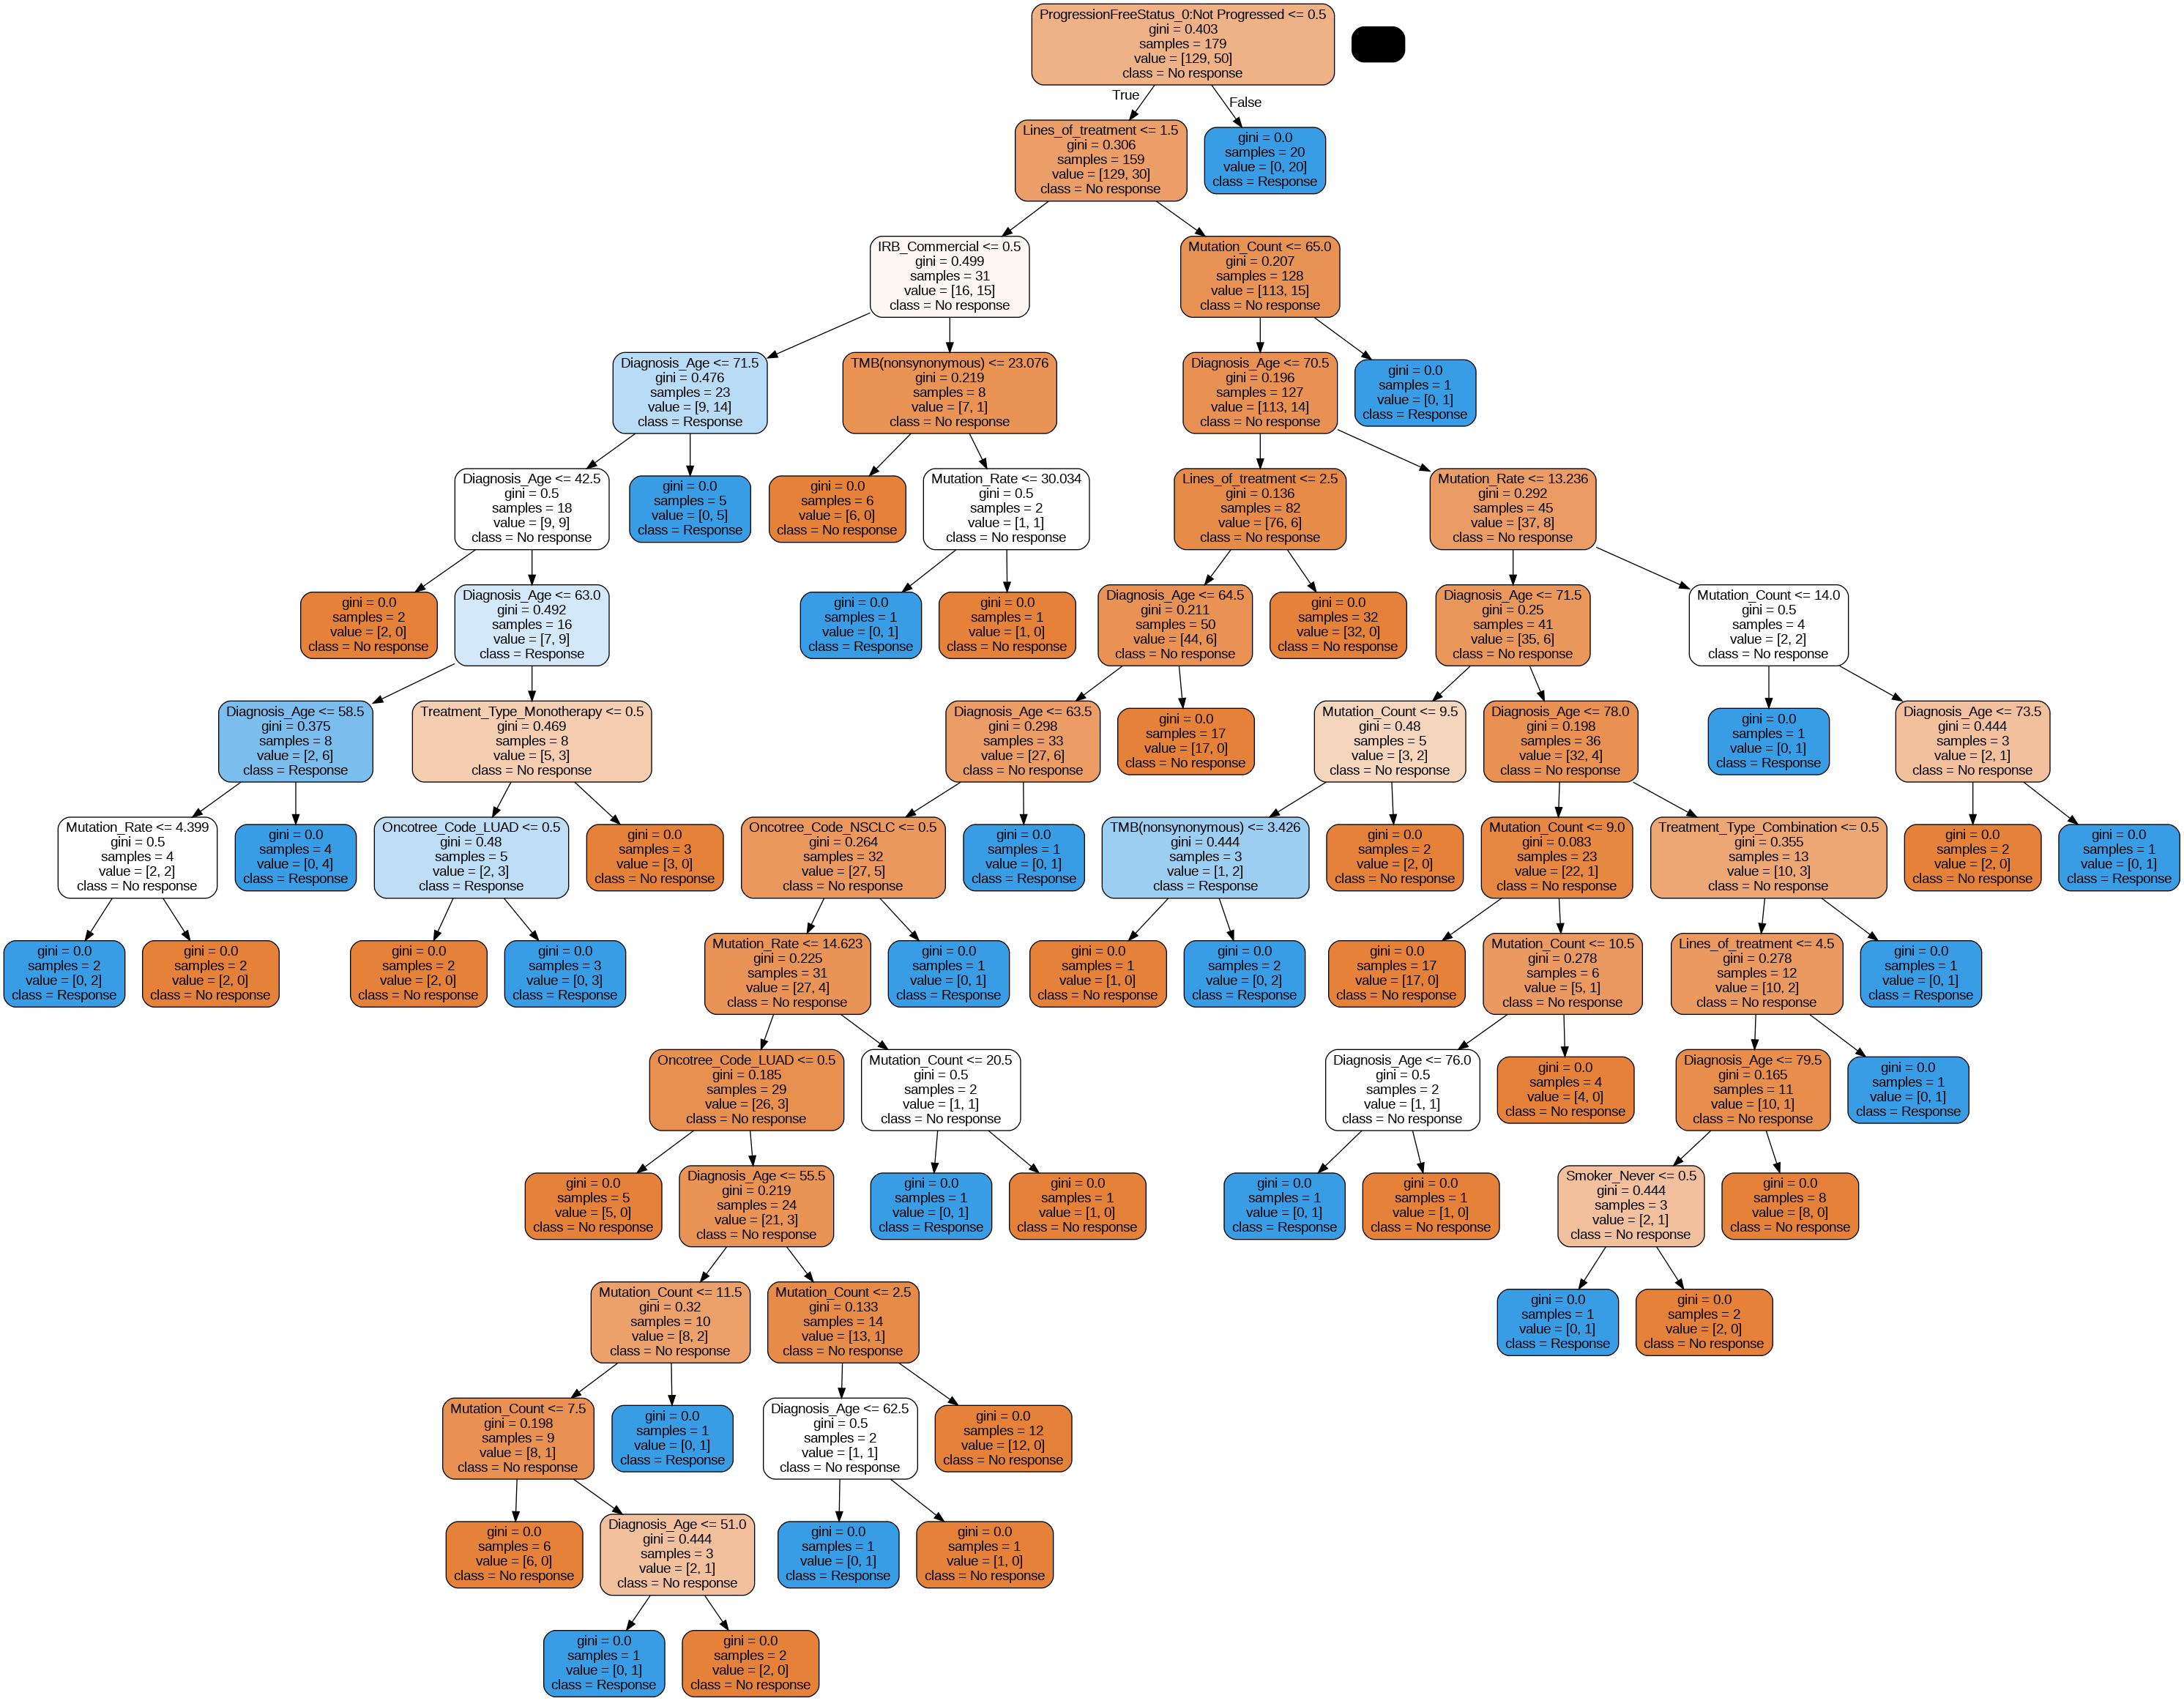

In [75]:
print_tree(dt)

In [76]:
from sklearn.metrics import accuracy_score
def scores(dt):
  y_train_pred = dt.predict(X_train)
  y_test_pred = dt.predict(X_test)
  train_score = accuracy_score(y_train, y_train_pred)
  test_score = accuracy_score(y_test, y_test_pred)
  print ( "train_score:" , train_score)
  print ( "test_score:", test_score)

In [77]:
scores(dt)

train_score: 1.0
test_score: 0.7083333333333334


In [78]:
dt = DecisionTreeClassifier(max_depth = 3, max_leaf_nodes=10) #with parameters selection
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=10)

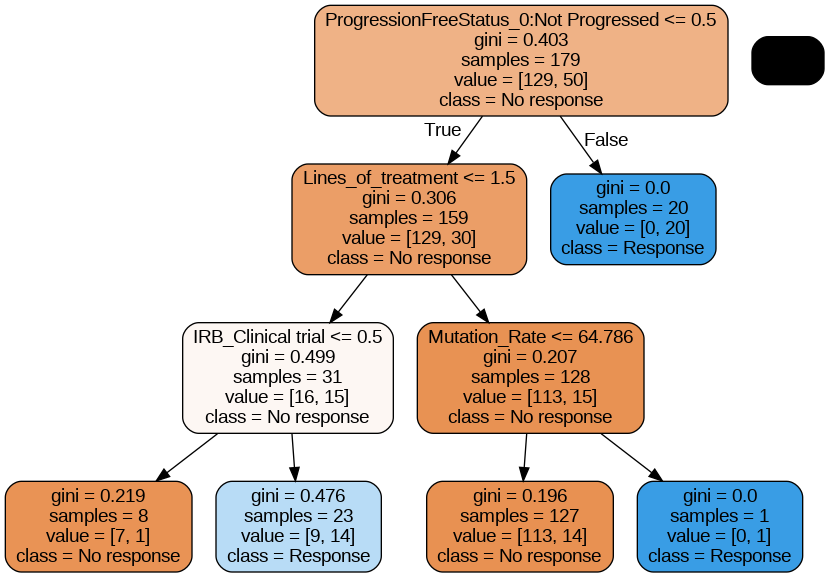

In [79]:
print_tree(dt)

In [80]:
scores(dt)

train_score: 0.8659217877094972
test_score: 0.7708333333333334
